## Deep Neural Network

In [ ]:
from tensorflow import keras

In [ ]:
# Preparing data
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# Preprocessing data
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape)

4431872/4422102 [==============================] - 0s 0us/step
(48000, 28, 28)


In [ ]:
# Build dnn model
model = keras.Sequential(name='fashion_MNIST')
model.add(keras.layers.Flatten(input_shape=(28,28))) # Flatten Layer instead of reshape()
model.add(keras.layers.Dense(100, activation='relu', name='hidden')) # Hidden layer should have more units
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "fashion_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# Evaluation
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 10s 4ms/step - loss: 0.5338 - accuracy: 0.8117
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3942 - accuracy: 0.8586
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3576 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3359 - accuracy: 0.8788
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8747


[0.3609144687652588, 0.874666690826416]

### Optimizer

#### [Momentum Optimization](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum)

In [ ]:
# when momentum > 0: use previous gradient as acceleration(momentum)
sgd = keras.optimizers.SGD(momentum=0.9)

##### [Nesterov Accelerated Gradient](http://proceedings.mlr.press/v28/sutskever13.pdf)

In [ ]:
# measures the gradient of the cost function ahead in the direction of the momentum
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

#### [Adaptive Learning-Rate Optimizers](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad)

In [ ]:
# modifies learning rate by parameter (squares of gradient)
adagrad = keras.optimizers.Adagrad(initial_accumulator_value=0.1) #  Starting value for the accumulators (per-parameter momentum values)

##### [RMSProp](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp)

In [ ]:
# Default: model.compile(optimizer='rmsprop')
# modifies learning rate by average of recent squared gradients
rmsprop = keras.optimizers.RMSprop(rho=0.9) # Exponential decay factor

#### [Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)

In [ ]:
# tracks (exponentially decaying) averages of both past gradients and past squared gradients
adam = keras.optimizers.Adam(beta_1=0.9, beta_2=0.999) # exponentail decay factor for 1st and 2nd momentum

# Build model with adam optimizer
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5232 - accuracy: 0.8186
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3960 - accuracy: 0.8592
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3546 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3282 - accuracy: 0.8803
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8810


[0.3314460515975952, 0.8809999823570251]

### Overfitting and Underfitting

#### History

In [ ]:
# function to build model
def model_fn(a_layer=None): #a_layer to add after hidden layer
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# History callback from trained model
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # Default: verbose=1 (2 without progress bar)

# Dictionary keys for training loss values and metrics at successive epochs
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


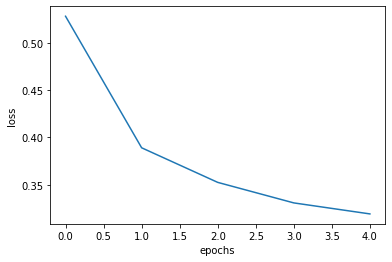

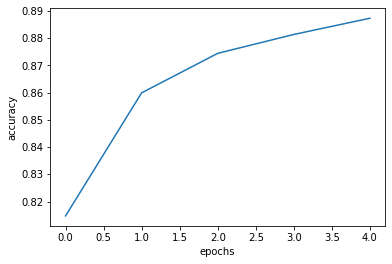

In [ ]:
# Plot loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

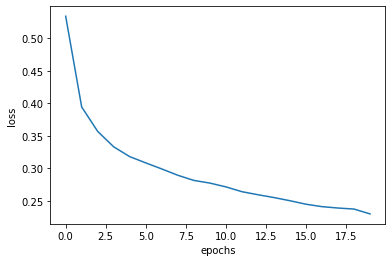

In [ ]:
# Use loss values to check over/underfitting

# Plot loss for epochs=20
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# Add validation metrics values (validation loss)
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


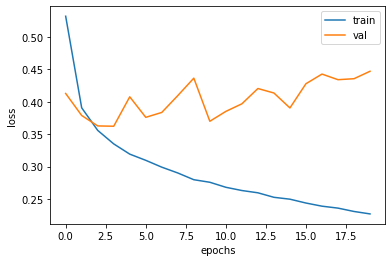

In [ ]:
# Plot train loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

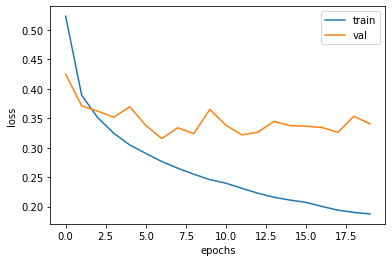

In [ ]:
# Compare loss with Adam optimizer
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#### Dropout

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________



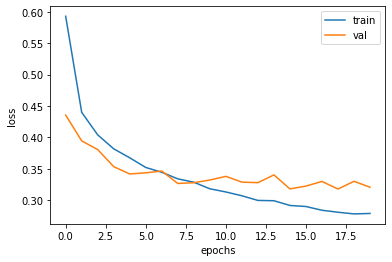

In [ ]:
# Apply Dropout to hidden layer
model = model_fn(keras.layers.Dropout(0.3)) # 30% dropout, the rest scaled up by 1/(1-rate)
model.summary()
print()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#### Save and Load Model

In [ ]:
# Train model with epochs=10
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# Save model parameters (all layer weights)
model.save_weights('model-weights.h5') # HDF5 format

# Save model structure and model parameters
model.save('model-whole.h5') # returns compiled model

In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Mar 19 08:30 model-weights.h5
-rw-r--r-- 1 root root 982664 Mar 19 08:30 model-whole.h5


In [ ]:
# Build a new model and load model parameters
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# calculate accuracy using argmax, predict() and mean()
import numpy as np

# predict() returns probability for each target label
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # best label for each val sample
print(np.mean(val_labels == val_target))

0.885


In [ ]:
# Load compiled model
model = keras.models.load_model('model-whole.h5')

# evaluate()
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8850


[0.3234621286392212, 0.8849999904632568]

#### Callback

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# Modelcheckpoint saves model at every epoch (Default: save_freq=epoch, monitor=val_loss)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True) # saves only the best model
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb])

In [ ]:
# Load compiled model
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3126 - accuracy: 0.8887


[0.31255924701690674, 0.8886666893959045]

##### Early Stopping

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# EarlyStopping stops when no improvement after the epoch (Default: monitor=val_loss)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # restores the best model parameters

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb, early_stopping_cb])

12



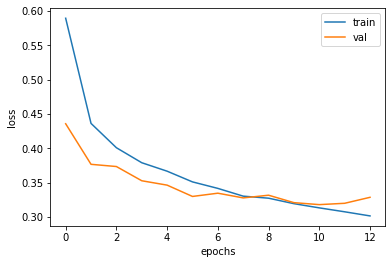

375/375 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8857


[0.31833380460739136, 0.8856666684150696]

In [ ]:
# Print stopped epoch (epoch starts from 0)
print(early_stopping_cb.stopped_epoch) # best_epoch = stopped_epoch - 2
print()

# Plot train loss and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# evaluate()
model.evaluate(val_scaled, val_target)